<a href="https://colab.research.google.com/github/sharna33/CSE_3210_DSP/blob/main/CSE_3210_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LAB-2 : Convolution***

**Date: 01.01.2025**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
x1 = np.array([1, 2, 2, 1, 1])
n1 = np.array([0, 1, 2, 3, 4])

x2 = np.array([3, 2, 1])
n2 = np.array([0, 1, 2])

# **Convolution by np.convolve using mode = "full"**

In [ ]:
np.convolve(x1, x2, mode = "full")   # ekhane 'same' or 'full' deya jabe

array([ 3,  8, 11,  9,  7,  3,  1])

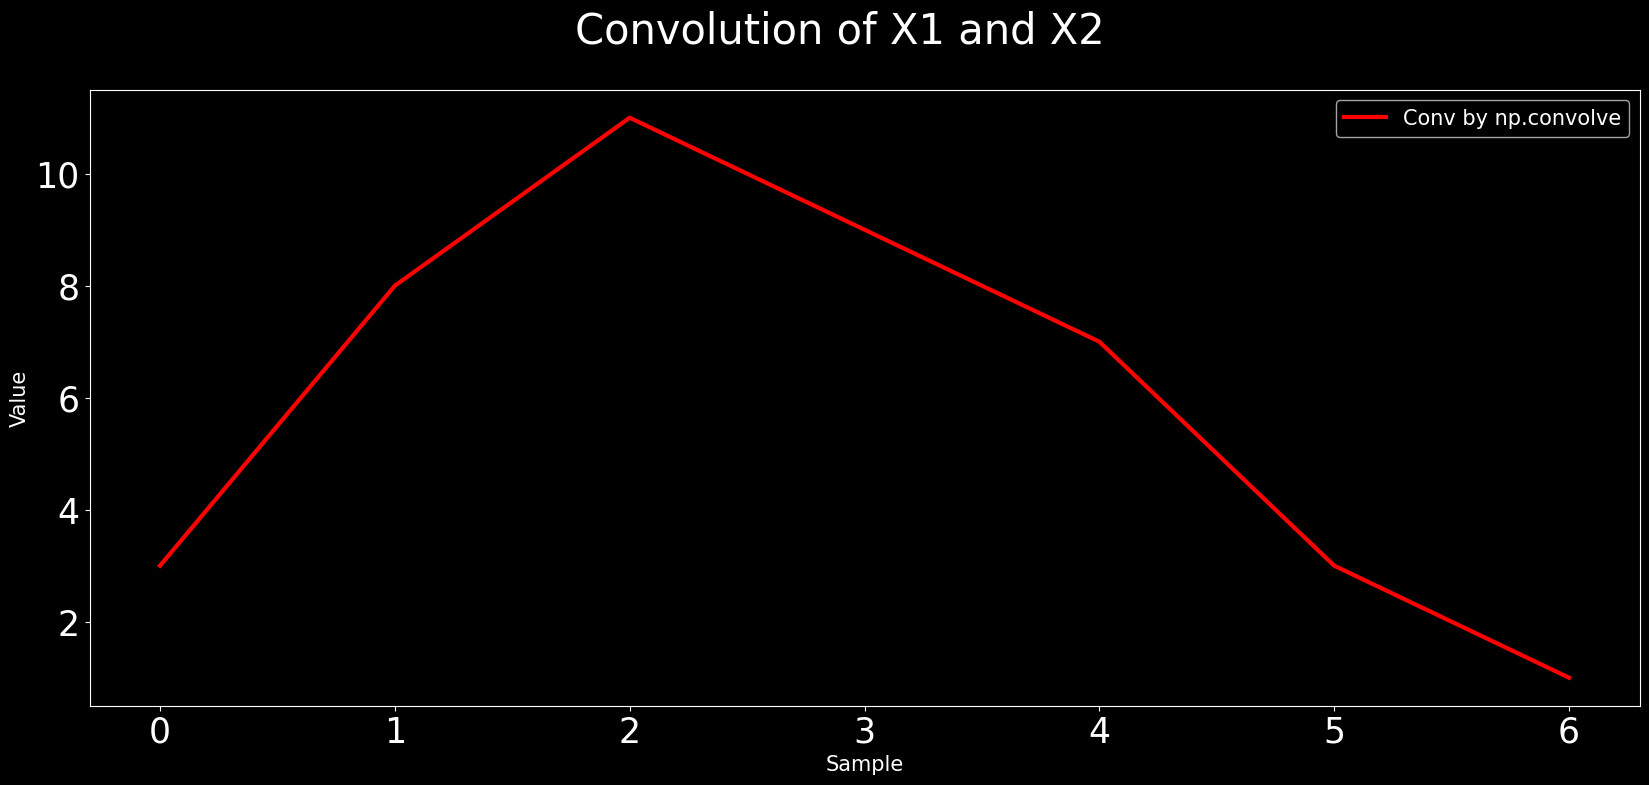

In [ ]:
# plotting convolution

plt.figure(figsize = (20,8))     # set the size of figure
plt.suptitle("Convolution of X1 and X2", fontsize = 30)
style.use("dark_background")
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
# plt.plot(convres, 'g^', marakersize = 20, label = 'Conv using numpy function')
plt.plot(np.convolve(x1, x2, mode = "full"), 'r-', linewidth = 3, label = 'Conv by np.convolve')
plt.xlabel('Sample', fontsize = 15)
plt.ylabel('Value', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# **Convolution by np.convolve using mode = "same"**

In [ ]:
np.convolve(x1, x2, mode = "same")

array([ 8, 11,  9,  7,  3])

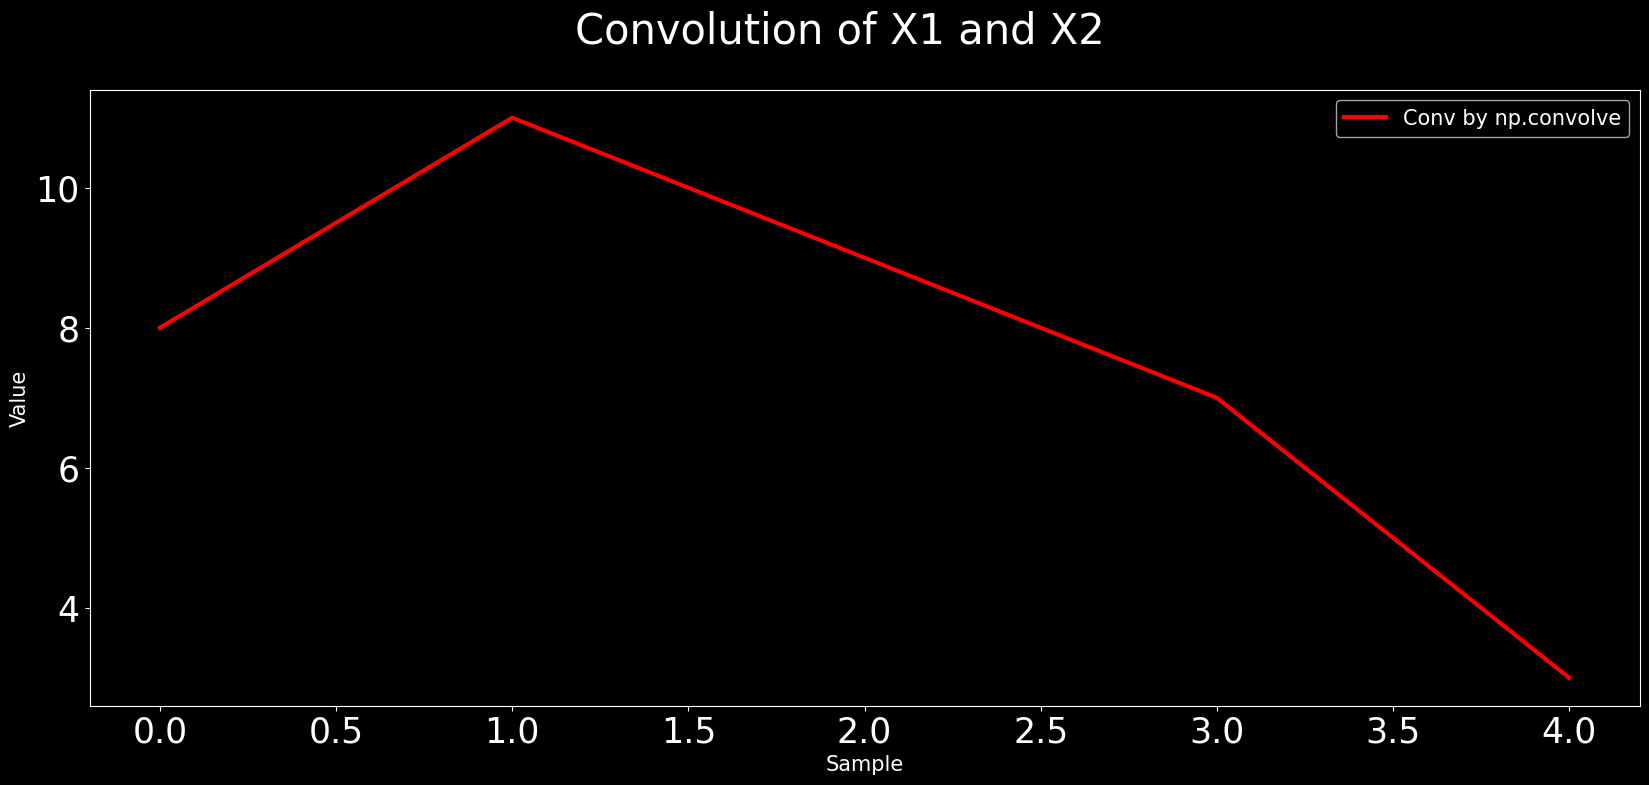

In [ ]:
# plotting convolution

plt.figure(figsize = (20,8))     # set the size of figure
plt.suptitle("Convolution of X1 and X2", fontsize = 30)
style.use("dark_background")
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
# plt.plot(convres, 'g^', marakersize = 20, label = 'Conv using numpy function')
plt.plot(np.convolve(x1, x2, mode = "same"), 'r-', linewidth = 3, label = 'Conv by np.convolve')
plt.xlabel('Sample', fontsize = 15)
plt.ylabel('Value', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# **Applications of Convolution**

# **Denoising signal**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
# create signal

srate = 256  # hz
t = np.arange(0, 3, 1/srate)
pnts = len(t)

print(pnts)
print(t)

768
[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.

In [ ]:
# creating noiseless signal
x = np.sin(2*np.pi*2*t)

# creating a random noise
noise = 5*np.random.randn(pnts)

# Adding noise on signal
Noisysignal = x + noise

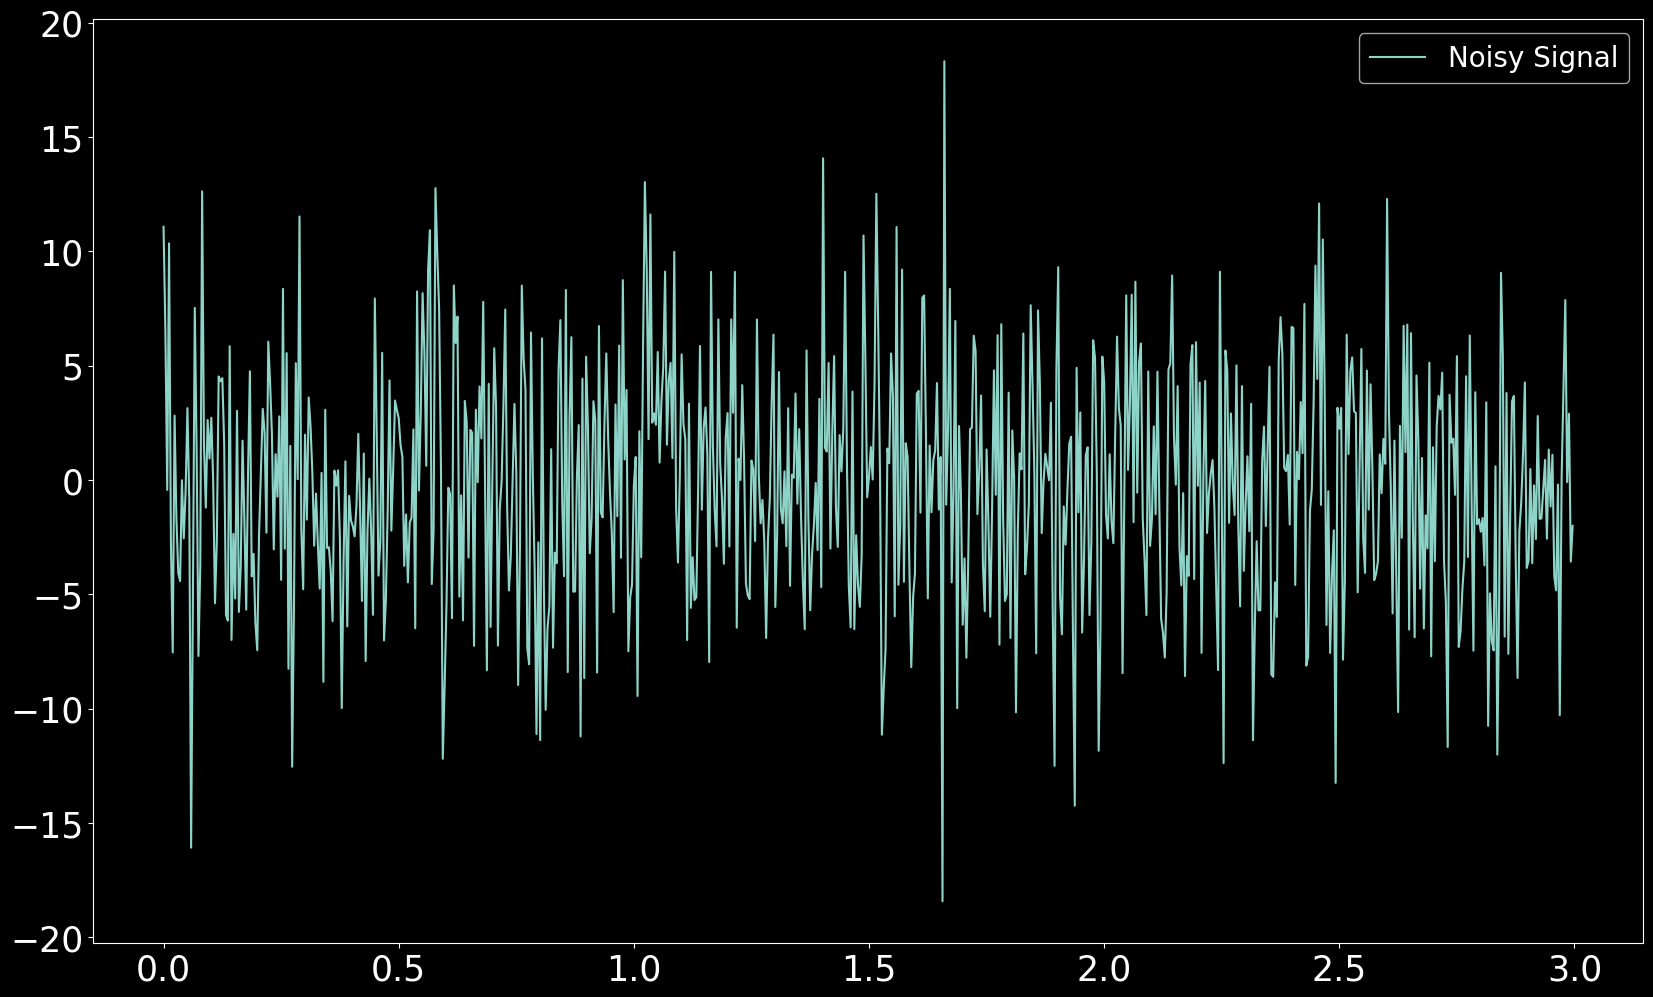

In [ ]:
# Plotting Noisy Signal

plt.figure(figsize=(20, 12))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(t, Noisysignal, label = 'Noisy Signal')
plt.legend(fontsize = 20)
plt.show()

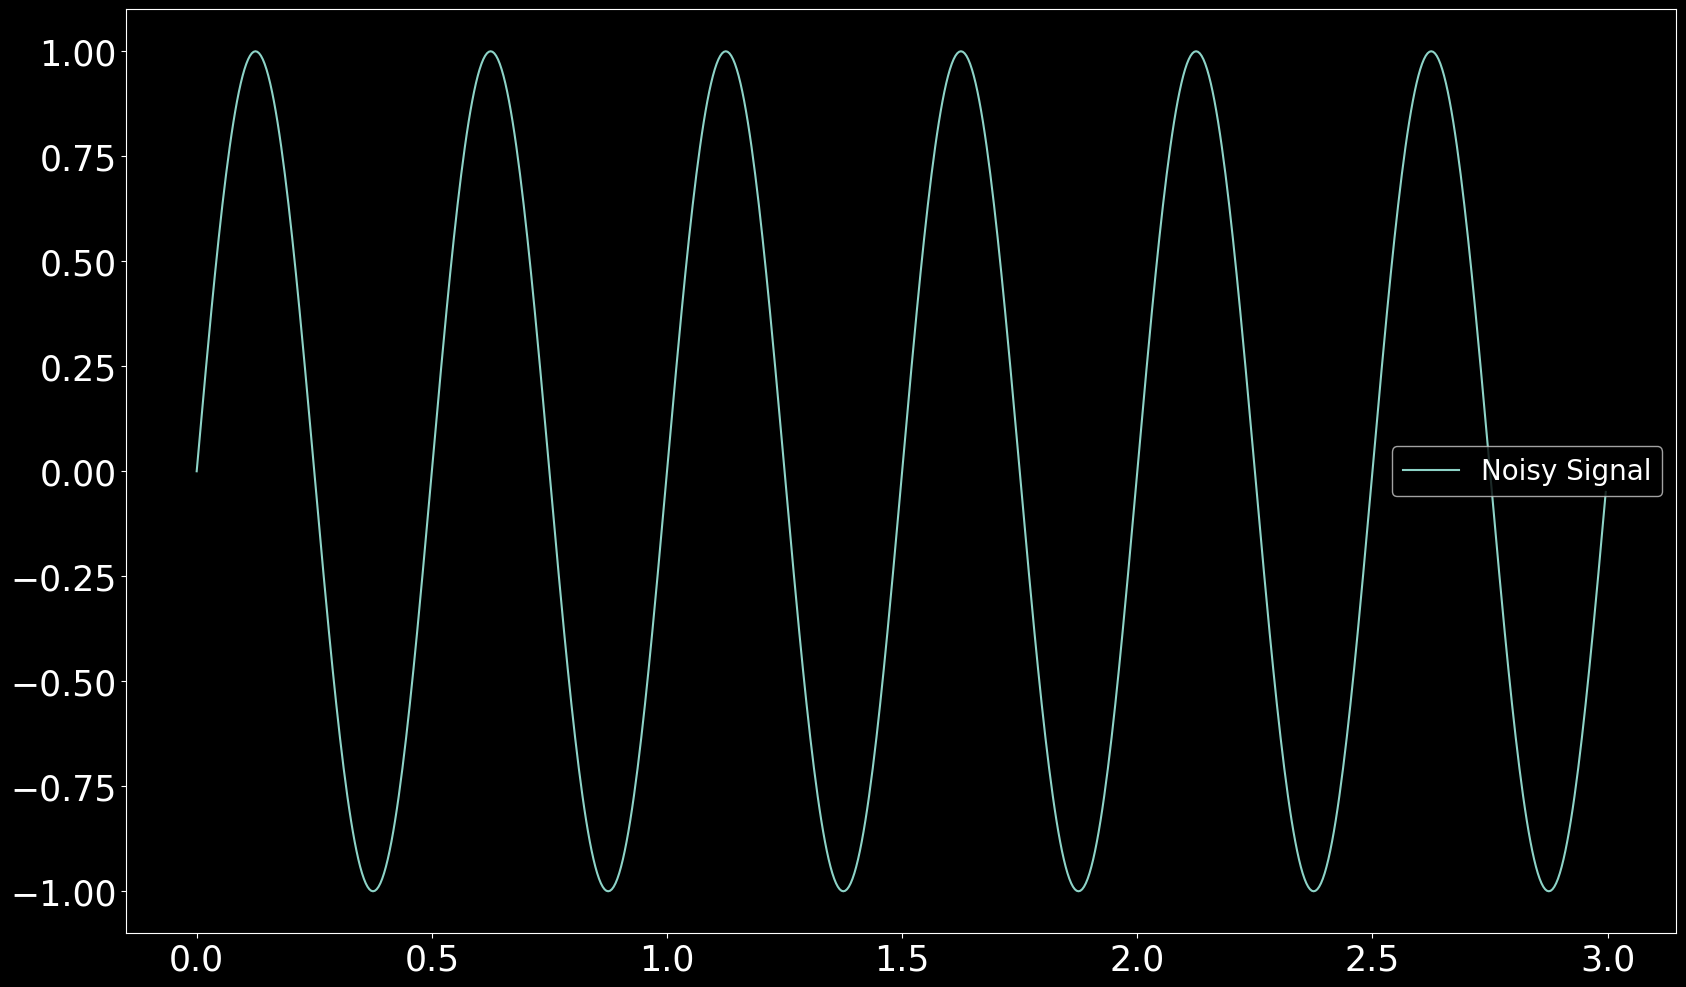

In [ ]:
# Original signal

plt.figure(figsize=(20, 12))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(t, x, label = 'Noisy Signal')
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# Selecting filter for denoising

filter = 2*np.ones(50)/10
filter

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# Filtering by convolution

filteredSignal = np.convolve(Noisysignal, filter, mode = 'same')

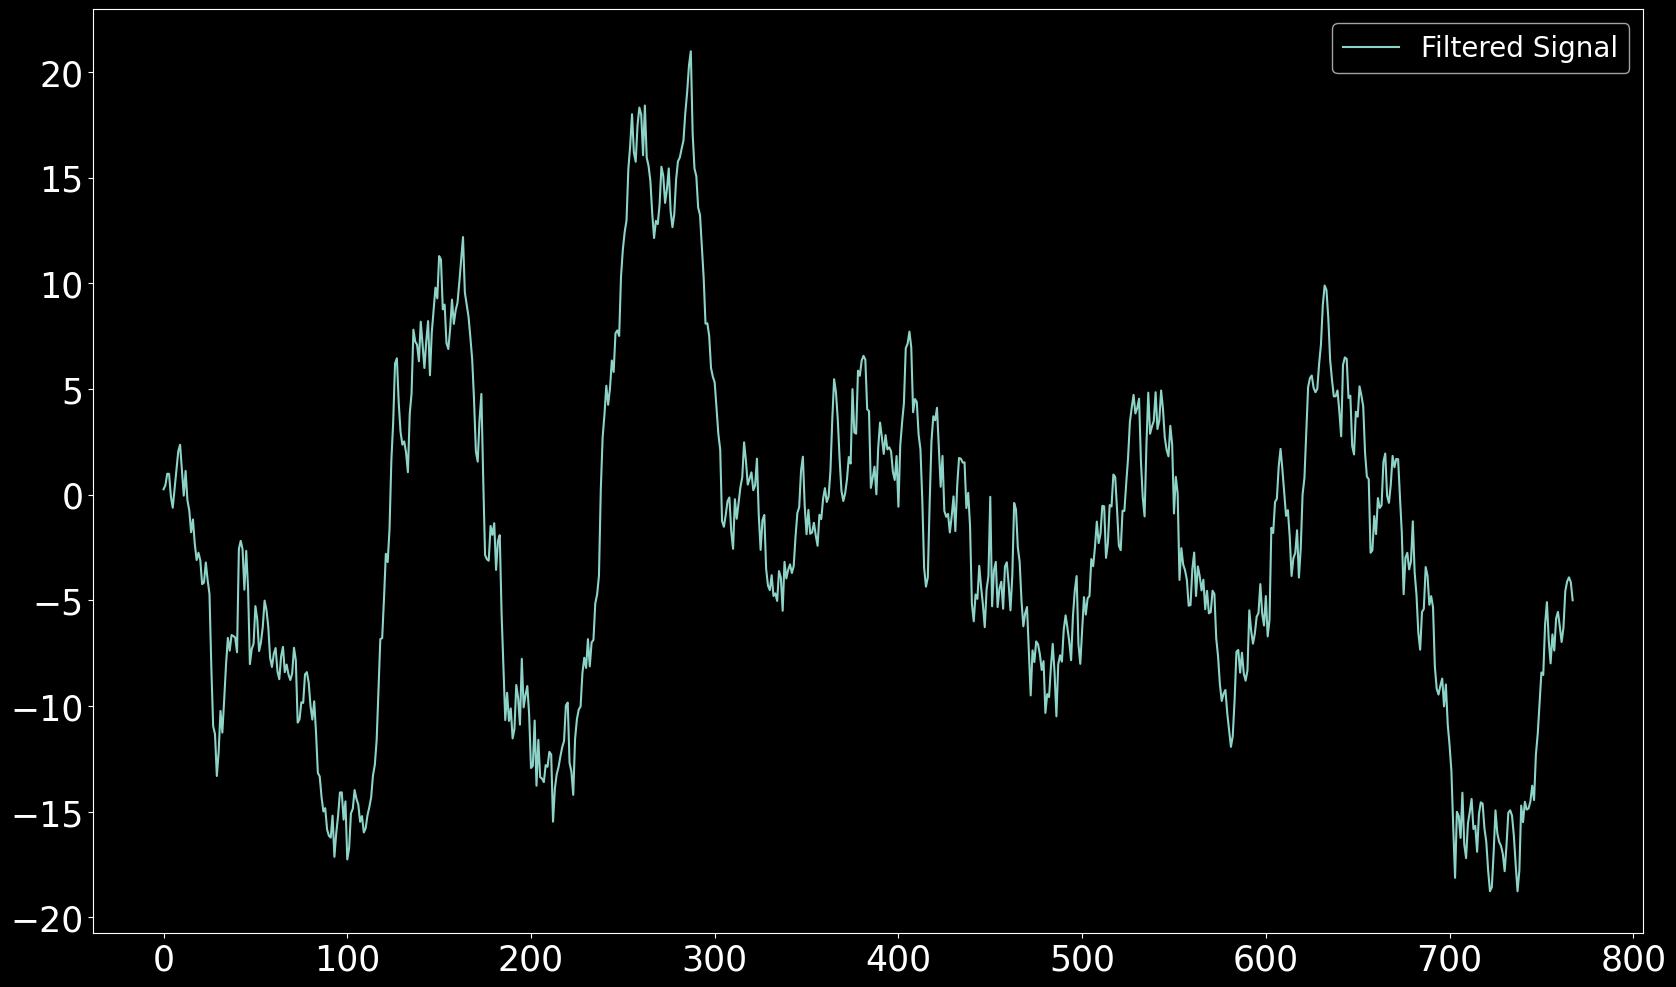

In [ ]:
# Plotting filtered signal(sinusoidal)

plt.figure(figsize=(20, 12))
plt.plot(filteredSignal, label = 'Filtered Signal')
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# again Filtering by convolution

filteredSignal = np.convolve(Noisysignal, filter, mode = 'same')
doublefilteredSignal = np.convolve(filteredSignal, filter, mode = 'same')

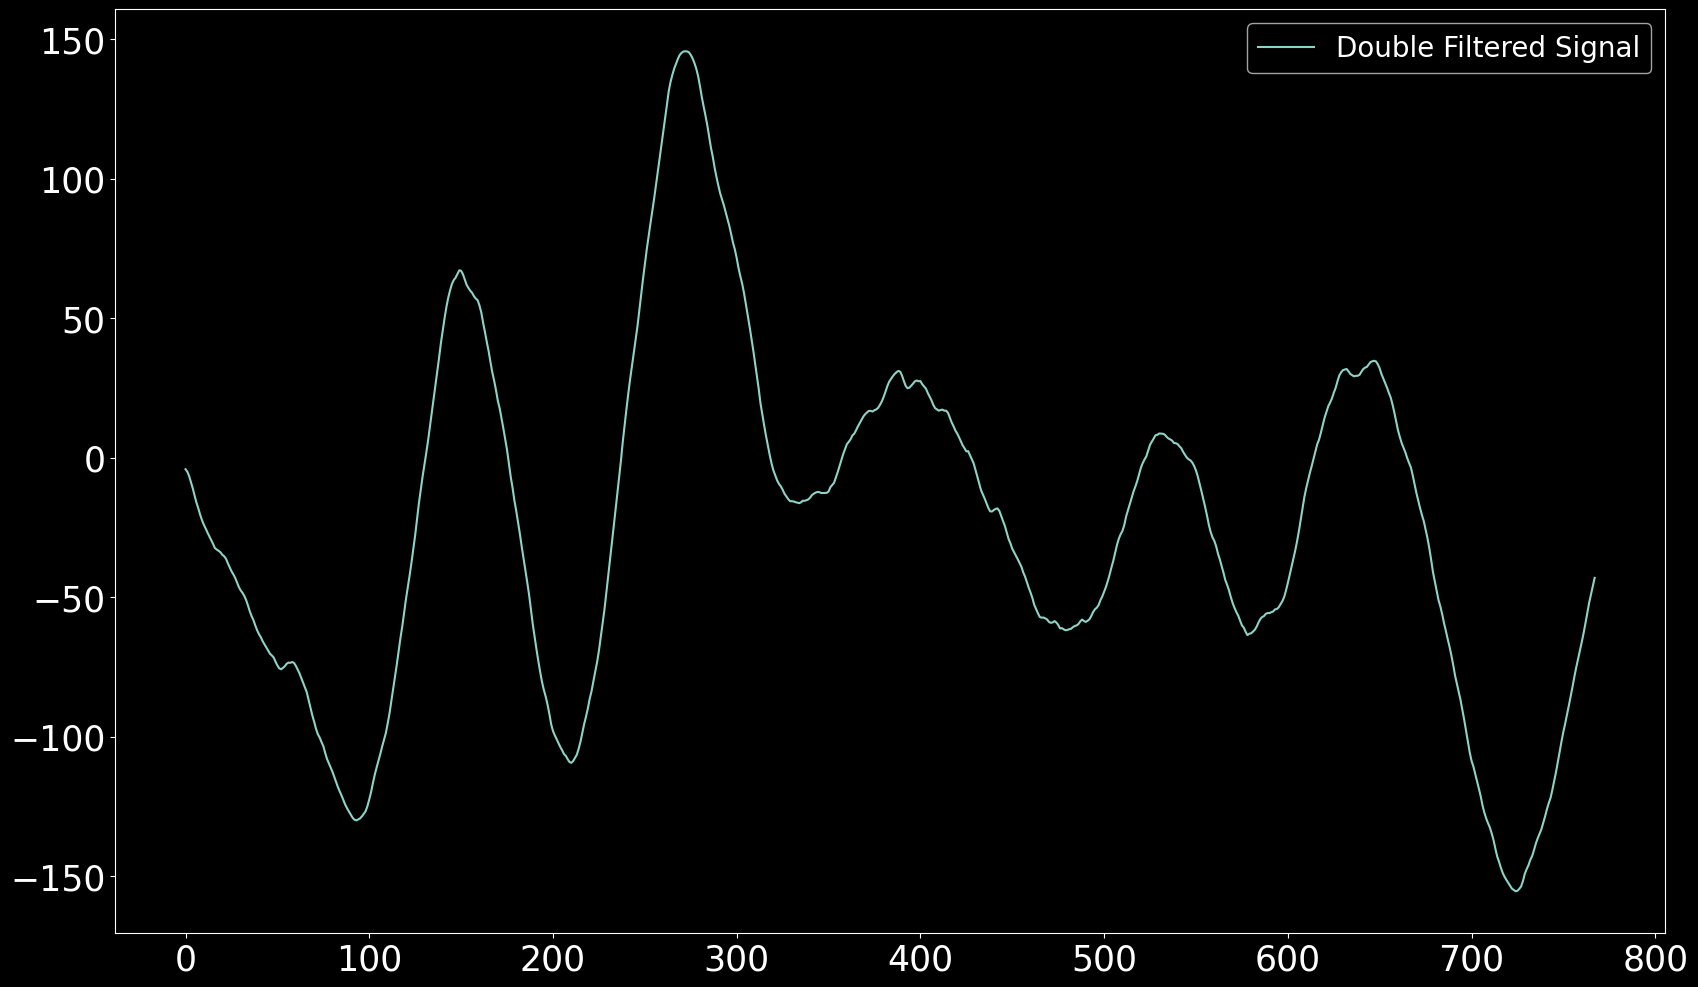

In [ ]:
# Plotting filtered signal(sinusoidal)

plt.figure(figsize=(20, 12))
plt.plot(doublefilteredSignal, label = 'Double Filtered Signal')
plt.legend(fontsize = 20)
plt.show()

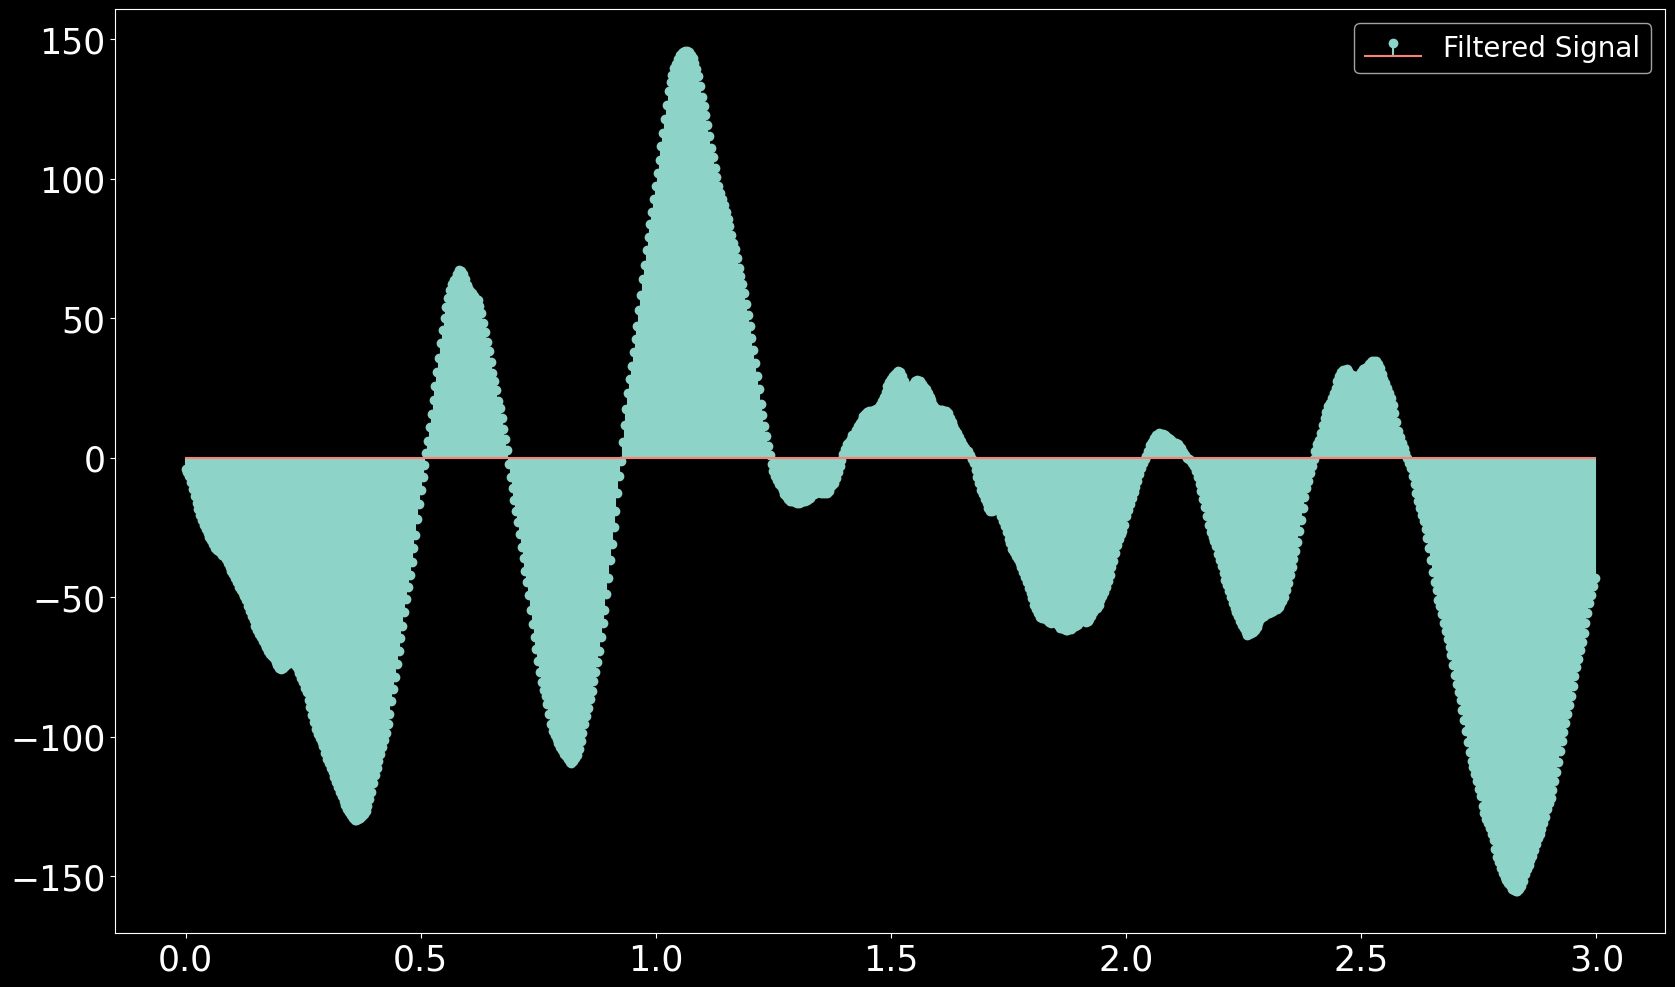

In [ ]:
plt.figure(figsize=(20, 12))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.stem(t, doublefilteredSignal, label = 'Filtered Signal')

plt.legend(fontsize = 20)
plt.show()

### ***Wezney Method***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def convolve_1d(signal, kernel):
    """
    Implement 1D convolution from scratch

    Parameters:
    signal (array): Input signal array
    kernel (array): Convolution kernel/filter

    Returns:
    array: Convolved output
    """
    signal_length = len(signal)
    kernel_length = len(kernel)
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length)
    padded_signal = np.pad(signal, (kernel_length - 1, kernel_length - 1), 'constant')
    kernel = kernel[::-1]

    for i in range(output_length):
        output[i] = np.sum(padded_signal[i:i + kernel_length] * kernel)

    return output

In [ ]:
# Generate a sample signal
t = np.linspace(0, 10, 100)
signal = np.sin(t) + 0.5 * np.sin(3 * t)

# Create a simple smoothing kernel
kernel = np.ones(5) / 5  # Moving average kernel

# Apply our convolution
result = convolve_1d(signal, kernel)

# Compare with NumPy's convolution
numpy_result = np.convolve(signal, kernel, mode='full')


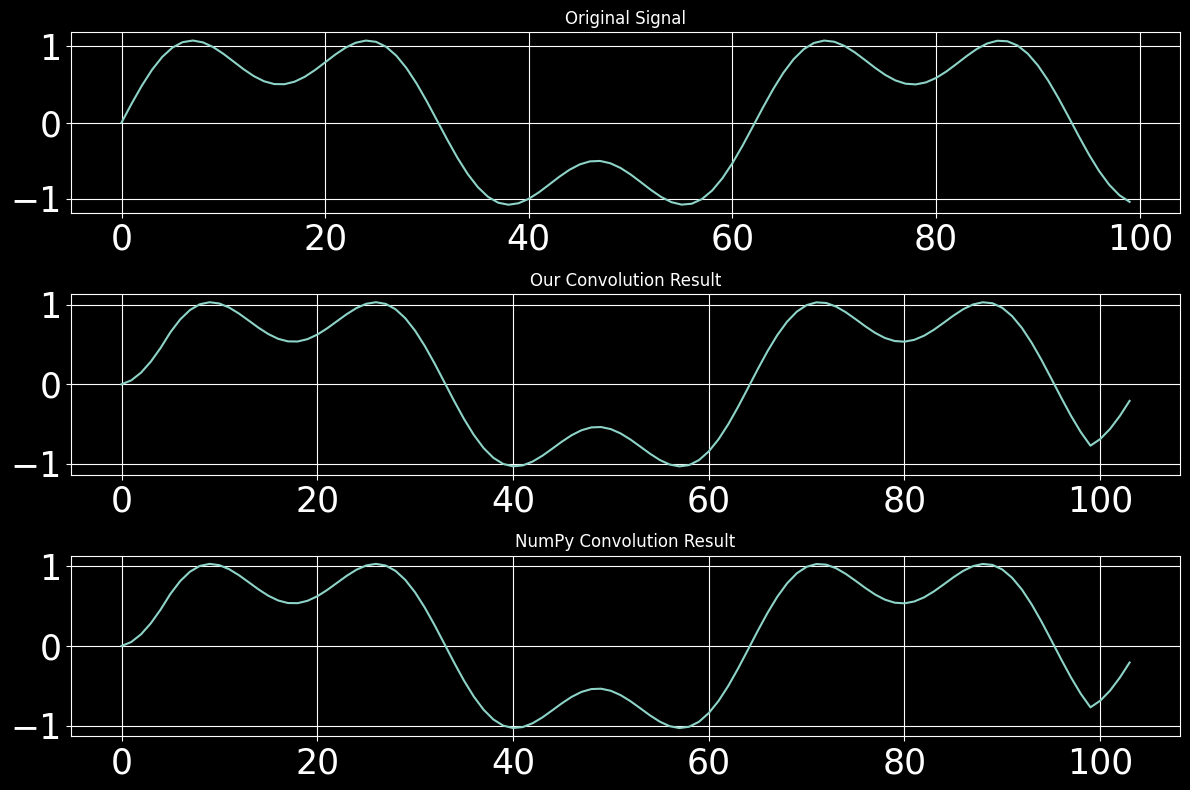

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(signal)
plt.title('Original Signal')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(result)
plt.title('Our Convolution Result')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(numpy_result)
plt.title('NumPy Convolution Result')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("Do the results match?", np.allclose(result, numpy_result))

Do the results match? True
